In [1]:
%autosave 0

Autosave disabled


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

In [3]:
df = data('tips')
df.head()

# size column is categorical data
# total_bill and tip columns are continuous data

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### **Null: Size 2 parties tip the same amount as any party in my dataset.**

### **Alternative: Size 2 parties tip a different amount from any party in my dataset.**

### **This will be a 1 sample, 2 tailed t-test!**

In [4]:
# define population mean
overall_tip = df.tip.mean()

In [5]:
# boolean mask to return all of the tables where party size is 2.
df[df['size'] == 2]

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
4,23.68,3.31,Male,No,Sun,Dinner,2
7,8.77,2.00,Male,No,Sun,Dinner,2
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2
11,10.27,1.71,Male,No,Sun,Dinner,2
13,15.42,1.57,Male,No,Sun,Dinner,2
15,14.83,3.02,Female,No,Sun,Dinner,2
16,21.58,3.92,Male,No,Sun,Dinner,2
21,17.92,4.08,Male,No,Sat,Dinner,2


In [6]:
# then off the mask we call the tip column
df[df['size'] == 2].tip

1      1.01
4      3.31
7      2.00
9      1.96
10     3.23
11     1.71
13     1.57
15     3.02
16     3.92
21     4.08
22     2.75
23     2.23
25     3.18
27     2.00
28     2.00
29     4.30
30     3.00
31     1.45
33     3.00
35     3.27
42     2.54
43     3.06
44     1.32
46     3.00
47     5.00
50     3.00
51     2.50
52     2.60
54     1.56
56     3.51
58     1.50
59     1.76
61     3.21
62     2.00
63     1.98
67     2.47
69     2.01
70     2.09
71     1.97
73     3.14
74     5.00
75     2.20
76     1.25
77     3.08
79     3.00
80     2.71
81     3.00
82     3.40
84     5.00
85     2.03
87     2.00
88     4.00
89     5.85
90     3.00
91     3.00
92     3.50
93     1.00
94     4.30
95     3.25
97     4.00
98     1.50
99     3.00
100    1.50
101    2.50
102    3.00
104    3.48
105    4.08
106    1.64
107    4.06
108    4.29
109    3.76
110    4.00
111    3.00
114    2.55
116    3.50
118    1.50
119    1.80
121    2.31
122    1.68
123    2.50
124    2.00
125    2.52
127    1.48
128 

In [7]:
# then we're going to sace this and assign it to 'tip_for_two'
tip_for_two =df[df['size'] == 2].tip

In [8]:
t_two, p_two = stats.ttest_1samp(tip_for_two, overall_tip)
t_two, p_two

(-5.271912239283316, 4.4632473980137726e-07)

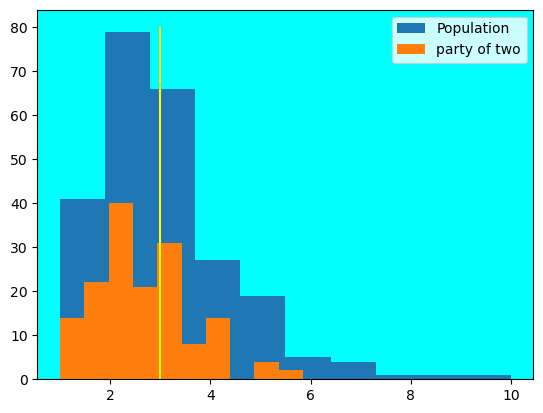

In [39]:
ax = plt.axes()
ax.set_facecolor("cyan")
plt.hist(df.tip, label = 'Population')
plt.hist(tip_for_two, label = 'party of two')
plt.vlines(overall_tip, 0, 80, color = 'yellow')
plt.legend()
plt.show()

In [24]:
a = 0.05

if p_two < a:

    print('We reject the null hypothesis.')

else:

    print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


**Null hypothesis: Guests for dinner pay less than or the same amount as guests for lunch**

**Alternative hypothesis: Guests for dinner pay more than guests for lunch**

**This will be a 2-Sample, 1 tailed t-test.**

In [25]:
# boolean mask to return data wth time values with lunch
df[df.time == 'Lunch']

,total_bill,tip,sex,smoker,day,time,size
78,27.20,4.00,Male,No,Thur,Lunch,4
79,22.76,3.00,Male,No,Thur,Lunch,2
80,17.29,2.71,Male,No,Thur,Lunch,2
81,19.44,3.00,Male,Yes,Thur,Lunch,2
82,16.66,3.40,Male,No,Thur,Lunch,2
83,10.07,1.83,Female,No,Thur,Lunch,1
84,32.68,5.00,Male,Yes,Thur,Lunch,2
85,15.98,2.03,Male,No,Thur,Lunch,2
86,34.83,5.17,Female,No,Thur,Lunch,4
87,13.03,2.00,Male,No,Thur,Lunch,2


In [28]:
# return a dsitribution of values by calling total_bill column
df[df.time == 'Lunch'].total_bill

78     27.20
79     22.76
80     17.29
81     19.44
82     16.66
83     10.07
84     32.68
85     15.98
86     34.83
87     13.03
88     18.28
89     24.71
90     21.16
118    10.65
119    12.43
120    24.08
121    11.69
122    13.42
123    14.26
124    15.95
125    12.48
126    29.80
127     8.52
128    14.52
129    11.38
130    22.82
131    19.08
132    20.27
133    11.17
134    12.26
135    18.26
136     8.51
137    10.33
138    14.15
139    16.00
140    13.16
141    17.47
142    34.30
143    41.19
144    27.05
145    16.43
146     8.35
147    18.64
148    11.87
149     9.78
150     7.51
192    19.81
193    28.44
194    15.48
195    16.58
196     7.56
197    10.34
198    43.11
199    13.00
200    13.51
201    18.71
202    12.74
203    13.00
204    16.40
205    20.53
206    16.47
221    12.16
222    13.42
223     8.58
224    15.98
225    13.42
226    16.27
227    10.09
Name: total_bill, dtype: float64

In [29]:
# create 2 samples of distribution for a 2 sample t-test

In [30]:
lunch_bills = df[df.time == 'Lunch'].total_bill

In [31]:
dinner_bills = df[df.time == 'Dinner'].total_bill

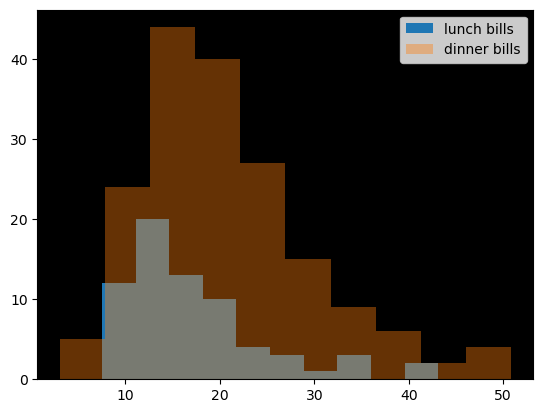

In [45]:
# Plot data for visualization comparison
ax = plt.axes()
ax.set_facecolor("black")
plt.hist(lunch_bills, label = 'lunch bills')
plt.hist(dinner_bills, label = 'dinner bills', alpha = 0.4)
plt.legend()
plt.show()

In [36]:
# we are going to compare the first distribution to the second distribution to receive a p_value form the perpective from the dinner bills perspective
t_time, p_time = stats.ttest_ind(dinner_bills, lunch_bills)
t_time, p_time

(2.8976375218366424, 0.004104621407595676)

In [37]:
# define alpha value ad t condition

a = 0.05

if t_time > 0 and (p_time / 2 < a):

    print('We reject the null hypothesis.')

else:

    print('We faile to reject the null hypothesis.')

We reject the null hypothesis.
